#### This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.
#### The dataset is available on both Kaggle and UCI and has 30000 rows and 25 columns
#### the goal is to predict wether a customer will deafult on credit card payment for the month of November 2005 
#### 0: not default, 1: default

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

pd.set_option("display.max_columns",100)

# ------> Importing data

In [2]:
# we import the daata and change the column names of 
#"default.payment.next.month" and 'PAY_0' to "target" and "PAY_1" respectively

data = pd.read_csv("UCI_Credit_Card.csv")
df = data.copy()
df.rename(columns={"default.payment.next.month":"target", 'PAY_0':'PAY_1'}, inplace=True)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


# ------> Preliminary analysis on data

In [3]:
# we see that we have no null values, therefore we can now move on too preprocesssing on each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [4]:
# we see that we have no missing vales either 
df.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
target       0
dtype: int64

# ------> Analysing each column and making necessary changes

## 1) ID

In [5]:
###### we drop this column as it provides no important information
df.drop('ID',axis=1,inplace=True)

## 2) Limit Bal

In [6]:
print(df['LIMIT_BAL'].max())
print(df['LIMIT_BAL'].min())


1000000.0
10000.0


C:\Users\Josh\anaconda3\envs\SignLangauge\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='LIMIT_BAL'>

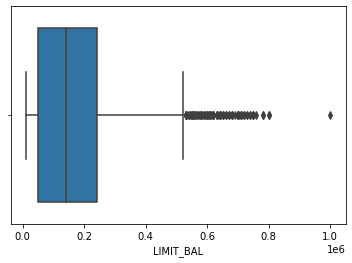

In [7]:
#check for outliers using box plot 
sns.boxplot(df['LIMIT_BAL'])

In [8]:
# we count the number of outliers in LIMIT_BAL
# We calculate the lower and upper fence
# We display the total number of outliers 

q1 = df['LIMIT_BAL'].quantile(0.25)
q3 = df['LIMIT_BAL'].quantile(0.75)

iqr = q3 -q1
print(iqr)
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

df2 = df[((df['LIMIT_BAL']<lower_fence)|(df['LIMIT_BAL']>upper_fence))]
print("number of outliers in LIMIT_BAL:" + str(df2.shape[0]))
print("outliers form :", (df2.shape[0]/df.shape[0])*100 , "% of total rows")

190000.0
number of outliers in LIMIT_BAL:167
outliers form : 0.5566666666666666 % of total rows


In [9]:
#number of outluers form less than 1% of total rows, therefore we drop the rows with outliers for LIMIT_BAL
df = df[~((df['LIMIT_BAL']<lower_fence)|(df['LIMIT_BAL']>upper_fence))]

C:\Users\Josh\anaconda3\envs\SignLangauge\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='LIMIT_BAL'>

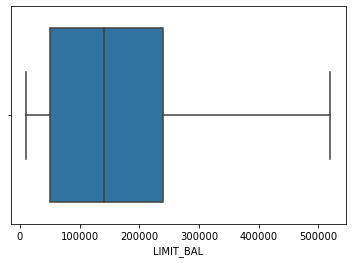

In [10]:
# we see that all the outliers have been removed 
sns.boxplot(df['LIMIT_BAL'])

In [11]:
# creare five equally distributed categories for LIMIT_BAL
pd.cut(df['LIMIT_BAL'],5).unique()

[(9490.0, 112000.0], (112000.0, 214000.0], (418000.0, 520000.0], (214000.0, 316000.0], (316000.0, 418000.0]]
Categories (5, interval[float64]): [(9490.0, 112000.0] < (112000.0, 214000.0] < (214000.0, 316000.0] < (316000.0, 418000.0] < (418000.0, 520000.0]]

In [12]:
# create a column that has the category for each of the LIMIT_BAL value
df['Categorical_LIMIT_BAL'] = pd.cut(df['LIMIT_BAL'],5)
df['Categorical_LIMIT_BAL']

C:\Users\Josh\anaconda3\envs\SignLangauge\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0          (9490.0, 112000.0]
1        (112000.0, 214000.0]
2          (9490.0, 112000.0]
3          (9490.0, 112000.0]
4          (9490.0, 112000.0]
                 ...         
29995    (214000.0, 316000.0]
29996    (112000.0, 214000.0]
29997      (9490.0, 112000.0]
29998      (9490.0, 112000.0]
29999      (9490.0, 112000.0]
Name: Categorical_LIMIT_BAL, Length: 29833, dtype: category
Categories (5, interval[float64]): [(9490.0, 112000.0] < (112000.0, 214000.0] < (214000.0, 316000.0] < (316000.0, 418000.0] < (418000.0, 520000.0]]

## 3) Sex

In [13]:
# The dataset has 1 = male, 2 = female
df['SEX'].unique()

array([2, 1], dtype=int64)

In [14]:
# make it 0 = male , 1 = female
for i,data in df.iterrows():           
    if data['SEX'] == 1:   
        df.at[i,"SEX"] = 0
    if data['SEX'] == 2:   
        df.at[i,"SEX"] = 1    

In [15]:
df['SEX'].unique()

array([1, 0], dtype=int64)

## 4) Education

In [16]:
# The dataset has values as EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
# 5 and 6 are unknown so we drop rows with this value

df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [17]:
df[(df['EDUCATION'] == 5) | (df['EDUCATION'] ==6)]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target,Categorical_LIMIT_BAL
47,150000.0,1,5,2,46,0,0,-1,0,0,-2,4463.0,3034.0,1170.0,1170.0,0.0,0.0,1013.0,1170.0,0.0,0.0,0.0,0.0,1,"(112000.0, 214000.0]"
69,20000.0,0,5,2,22,2,0,0,0,0,0,18565.0,17204.0,17285.0,18085.0,11205.0,5982.0,0.0,1200.0,1000.0,500.0,1000.0,0.0,0,"(9490.0, 112000.0]"
385,410000.0,1,5,1,42,0,0,0,0,0,0,338106.0,342904.0,344464.0,240865.0,234939.0,240176.0,15000.0,14000.0,9000.0,8500.0,9000.0,8300.0,0,"(316000.0, 418000.0]"
502,230000.0,1,6,2,46,0,0,0,0,0,0,221590.0,227397.0,230302.0,186635.0,189896.0,193351.0,10000.0,9000.0,8000.0,8000.0,7500.0,7000.0,0,"(214000.0, 316000.0]"
504,30000.0,0,6,1,53,-2,-2,-2,-2,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,"(9490.0, 112000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29811,50000.0,0,5,2,46,0,0,0,-1,0,0,49336.0,49623.0,19900.0,19183.0,19563.0,19157.0,1423.0,1000.0,19183.0,687.0,696.0,776.0,0,"(9490.0, 112000.0]"
29836,180000.0,0,6,1,34,-2,-2,-2,-2,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,"(112000.0, 214000.0]"
29839,150000.0,0,5,1,36,0,0,0,0,0,0,216482.0,220889.0,133616.0,136378.0,139219.0,142172.0,5500.0,3800.0,3900.0,4000.0,4100.0,4100.0,0,"(112000.0, 214000.0]"
29920,50000.0,0,5,1,45,2,0,0,0,0,0,71927.0,73514.0,75373.0,50947.0,51020.0,0.0,3000.0,3428.0,2002.0,1023.0,0.0,0.0,1,"(9490.0, 112000.0]"


In [18]:
print("% of rows: ",df[(df['EDUCATION'] == 5) | (df['EDUCATION'] ==6)].shape[0]/df.shape[0])

% of rows:  0.010994536251801697


In [19]:
# we drop values 5 and 6 as they are unknown

df = df[(df['EDUCATION'] != 5) & (df['EDUCATION'] !=6)]
df['EDUCATION'].unique()

array([2, 1, 3, 4, 0], dtype=int64)

## 5) Marriage

In [20]:
# MARRIAGE: Marital status (1=married, 2=single, 3=others)
# 0 is an unknown value and is wrong 
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

In [21]:
# there are ony 54 rows with MARRIAGE == 0
# we drop all rows with MARRIAGE = 0

print(df[df['MARRIAGE'] ==0].shape[0])
print("% of rows with MARRIAGE =0: ", df[df['MARRIAGE'] ==0].shape[0]/df.shape[0])


54
% of rows with MARRIAGE =0:  0.0018301982714794102


In [22]:
df = df[~((df['MARRIAGE'] == 0))]

In [23]:
#type(marriage_mode[0])

## 6) Age 

In [24]:
print(df['AGE'].max())
print(df['AGE'].min())

79
21


C:\Users\Josh\anaconda3\envs\SignLangauge\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='AGE'>

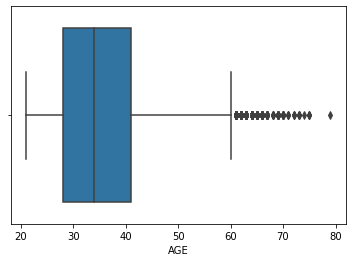

In [25]:
# check for outliers in AGE 
sns.boxplot(df['AGE'])

In [26]:
q1 = df['AGE'].quantile(0.25)
q3 = df['AGE'].quantile(0.75)

iqr = q3 -q1
print(iqr)
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

df2 = df[((df['AGE']<lower_fence)|(df['AGE']>upper_fence))]
print("number of outliers in AGE:" + str(df2.shape[0]))
print("outliers form :", (df2.shape[0]/df.shape[0])*100 , "% of total rows")

13.0
number of outliers in AGE:266
outliers form : 0.9031951376863264 % of total rows


In [27]:
# number of outluers form less than 1% of total rows, therefore we drop the rows with outliers for LIMIT_BAL
       
df = df[~((df['AGE']<lower_fence)|(df['AGE']>upper_fence))]

C:\Users\Josh\anaconda3\envs\SignLangauge\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='AGE'>

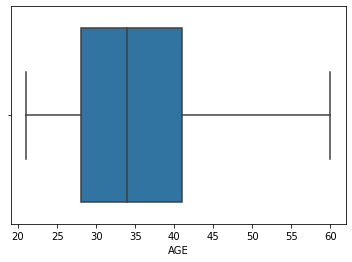

In [28]:
# check for outliers again
# we see that no more outliers are left 

sns.boxplot(df['AGE'])

In [29]:
# create a column that has the category for each of the AGE value

df['Categorical_Age'] = pd.cut(df['AGE'],5)
df['Categorical_Age']

0        (20.961, 28.8]
1        (20.961, 28.8]
2          (28.8, 36.6]
3          (36.6, 44.4]
4          (52.2, 60.0]
              ...      
29995      (36.6, 44.4]
29996      (36.6, 44.4]
29997      (36.6, 44.4]
29998      (36.6, 44.4]
29999      (44.4, 52.2]
Name: Categorical_Age, Length: 29185, dtype: category
Categories (5, interval[float64]): [(20.961, 28.8] < (28.8, 36.6] < (36.6, 44.4] < (44.4, 52.2] < (52.2, 60.0]]

## 7) All the pay columns

In [30]:
# -1=pay duly, 1=payment delay for one month, 2=payment delay for two months,
# … 8=payment delay for eight months, 9=payment delay for nine months and above
# 0 is a wrong value entered, we drop columns with 0
# -2 is a wrong value entered, we drop columns with -2
# we change -1 to 0 for duly paid

In [31]:
df = df[~((df['PAY_1'] == 0))]
df = df[~((df['PAY_2'] == 0))]
df = df[~((df['PAY_3'] == 0))]
df = df[~((df['PAY_4'] == 0))]
df = df[~((df['PAY_5'] == 0))]
df = df[~((df['PAY_6'] == 0))]

In [32]:
df = df[~((df['PAY_1'] == -2))]
df = df[~((df['PAY_2'] == -2))]
df = df[~((df['PAY_3'] == -2))]
df = df[~((df['PAY_4'] == -2))]
df = df[~((df['PAY_5'] == -2))]
df = df[~((df['PAY_6'] == -2))]


In [33]:
for i, data in df.iterrows():
    if data['PAY_1'] == -1:
        df.at[i,'PAY_1'] = 0

    
    if data['PAY_2'] == -1:
        df.at[i,'PAY_2'] = 0

    
    if data['PAY_3'] == -1:
        df.at[i,'PAY_3'] = 0

    
    if data['PAY_4'] == -1:
        df.at[i,'PAY_4'] = 0


    if data['PAY_5'] == -1:
        df.at[i,'PAY_5'] = 0


    if data['PAY_6'] == -1:
        df.at[i,'PAY_6'] = 0


In [34]:
df['PAY_1'].unique()

array([0, 2, 1, 3, 8, 4, 7, 5, 6], dtype=int64)

In [35]:
df.shape

(3986, 26)

## 8) all the BILL_AMT and PAY_AMT columns

In [36]:
# The BILL_AMT columns have negative values, we convert them to positive as bill can't be negative

df['BILL_AMT1']=abs(df['BILL_AMT1'])
df['BILL_AMT2']=abs(df['BILL_AMT2'])
df['BILL_AMT3']=abs(df['BILL_AMT3'])
df['BILL_AMT4']=abs(df['BILL_AMT4'])
df['BILL_AMT5']=abs(df['BILL_AMT5'])
df['BILL_AMT6']=abs(df['BILL_AMT6'])

# ------> Normalising BILL_AMT and PAY_AMT columns

In [37]:
# we normalise all the BILL_AMT and PAY_AMT columns

df['BILL_AMT1'] = (df['BILL_AMT1'] - df['BILL_AMT1'].min())/(df['BILL_AMT1'].max() - df['BILL_AMT1'].min())
df['BILL_AMT2'] = (df['BILL_AMT2'] - df['BILL_AMT2'].min())/(df['BILL_AMT2'].max() - df['BILL_AMT2'].min())
df['BILL_AMT3'] = (df['BILL_AMT3'] - df['BILL_AMT3'].min())/(df['BILL_AMT3'].max() - df['BILL_AMT3'].min())
df['BILL_AMT4'] = (df['BILL_AMT4'] - df['BILL_AMT4'].min())/(df['BILL_AMT4'].max() - df['BILL_AMT4'].min())
df['BILL_AMT5'] = (df['BILL_AMT5'] - df['BILL_AMT5'].min())/(df['BILL_AMT5'].max() - df['BILL_AMT5'].min())
df['BILL_AMT6'] = (df['BILL_AMT6'] - df['BILL_AMT6'].min())/(df['BILL_AMT6'].max() - df['BILL_AMT6'].min())




In [38]:
df['PAY_AMT1'] = (df['PAY_AMT1'] - df['PAY_AMT1'].min())/(df['PAY_AMT1'].max() - df['PAY_AMT1'].min())
df['PAY_AMT2'] = (df['PAY_AMT2'] - df['PAY_AMT2'].min())/(df['PAY_AMT2'].max() - df['PAY_AMT2'].min())
df['PAY_AMT3'] = (df['PAY_AMT3'] - df['PAY_AMT3'].min())/(df['PAY_AMT3'].max() - df['PAY_AMT3'].min())
df['PAY_AMT4'] = (df['PAY_AMT4'] - df['PAY_AMT4'].min())/(df['PAY_AMT4'].max() - df['PAY_AMT4'].min())
df['PAY_AMT5'] = (df['PAY_AMT5'] - df['PAY_AMT5'].min())/(df['PAY_AMT5'].max() - df['PAY_AMT5'].min())
df['PAY_AMT6'] = (df['PAY_AMT6'] - df['PAY_AMT6'].min())/(df['PAY_AMT6'].max() - df['PAY_AMT6'].min())

In [39]:
# We also create five categories each for all the BILL_AMT and PAY_AMT columns

df['Categorical_BILL_AMT1']=pd.cut(df['BILL_AMT1'],5)
df['Categorical_BILL_AMT2']=pd.cut(df['BILL_AMT2'],5)
df['Categorical_BILL_AMT3']=pd.cut(df['BILL_AMT3'],5)
df['Categorical_BILL_AMT4']=pd.cut(df['BILL_AMT4'],5)
df['Categorical_BILL_AMT5']=pd.cut(df['BILL_AMT5'],5)
df['Categorical_BILL_AMT6']=pd.cut(df['BILL_AMT6'],5)


In [40]:
df['Categorical_PAY_AMT1']=pd.cut(df['PAY_AMT1'],5)
df['Categorical_PAY_AMT2']=pd.cut(df['PAY_AMT2'],5)
df['Categorical_PAY_AMT3']=pd.cut(df['PAY_AMT3'],5)
df['Categorical_PAY_AMT4']=pd.cut(df['PAY_AMT4'],5)
df['Categorical_PAY_AMT5']=pd.cut(df['PAY_AMT5'],5)
df['Categorical_PAY_AMT6']=pd.cut(df['PAY_AMT6'],5)

# ------> Encoding

In [41]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target,Categorical_LIMIT_BAL,Categorical_Age,Categorical_BILL_AMT1,Categorical_BILL_AMT2,Categorical_BILL_AMT3,Categorical_BILL_AMT4,Categorical_BILL_AMT5,Categorical_BILL_AMT6,Categorical_PAY_AMT1,Categorical_PAY_AMT2,Categorical_PAY_AMT3,Categorical_PAY_AMT4,Categorical_PAY_AMT5,Categorical_PAY_AMT6
11,260000.0,1,1,2,51,0,0,0,0,0,2,0.021075,0.037840,0.021599,0.018826,0.050235,0.031255,0.116545,0.032895,0.020554,0.115125,0.000000,0.010542,0,"(214000.0, 316000.0]","(44.4, 52.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]"
21,120000.0,1,2,1,39,0,0,0,0,0,0,0.000543,0.000552,0.000685,0.000000,0.001425,0.000723,0.001688,0.001043,0.000000,0.003263,0.001044,0.000000,1,"(112000.0, 214000.0]","(36.6, 44.4]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]"
28,50000.0,1,3,1,47,0,0,0,0,0,0,0.001117,0.005963,0.007404,0.004509,0.068589,0.000588,0.018242,0.011292,0.004895,0.157089,0.000849,0.000000,0,"(9490.0, 112000.0]","(44.4, 52.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]"
30,230000.0,1,1,2,27,0,0,0,0,0,0,0.028612,0.030148,0.028752,0.033905,0.032248,0.084433,0.092251,0.043837,0.036732,0.073857,0.123148,0.000000,0,"(214000.0, 316000.0]","(20.961, 28.8]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]"
48,380000.0,0,2,2,32,0,0,0,0,0,0,0.038505,0.037613,0.032800,0.070773,0.026708,0.027150,0.115060,0.049967,0.059094,0.061178,0.039214,0.023896,0,"(316000.0, 418000.0]","(28.8, 36.6]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29934,360000.0,0,2,1,45,0,0,0,0,0,0,0.031889,0.001460,0.001812,0.001848,0.002222,0.002255,0.004466,0.002759,0.002002,0.005090,0.003256,0.001770,0,"(316000.0, 418000.0]","(44.4, 52.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]"
29942,130000.0,0,3,1,45,0,0,0,0,0,0,0.002535,0.003189,0.006136,0.006092,0.003573,0.002778,0.009754,0.009344,0.006600,0.008182,0.004012,0.006956,1,"(112000.0, 214000.0]","(44.4, 52.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]"
29976,40000.0,0,2,2,47,2,2,3,2,2,2,0.089997,0.095852,0.115767,0.113303,0.106278,0.107326,0.021367,0.000000,0.004789,0.000000,0.011624,0.000000,1,"(9490.0, 112000.0]","(44.4, 52.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]"
29991,210000.0,0,2,1,34,3,2,2,2,2,2,0.004297,0.004365,0.005418,0.005526,0.005635,0.005717,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,"(112000.0, 214000.0]","(28.8, 36.6]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0

In [42]:
# ---------------------LABEL ENCODING-------------
# now to create encoded columns, we first convert all columns to 'category' type 
# we then create encoded columns

df['Categorical_LIMIT_BAL'] = df['Categorical_LIMIT_BAL'].astype('category')
df['Categorical_LIMIT_BAL_encode'] = df['Categorical_LIMIT_BAL'].cat.codes

df['Categorical_Age'] = df['Categorical_Age'].astype('category')
df['Categorical_Age_encode'] = df['Categorical_Age'].cat.codes

df['Categorical_BILL_AMT1'] = df['Categorical_BILL_AMT1'].astype('category')
df['Categorical_BILL_AMT1_encode'] = df['Categorical_BILL_AMT1'].cat.codes

df['Categorical_BILL_AMT2'] = df['Categorical_BILL_AMT2'].astype('category')
df['Categorical_BILL_AMT2_encode'] = df['Categorical_BILL_AMT2'].cat.codes

df['Categorical_BILL_AMT3'] = df['Categorical_BILL_AMT3'].astype('category')
df['Categorical_BILL_AMT3_encode'] = df['Categorical_BILL_AMT3'].cat.codes

df['Categorical_BILL_AMT4'] = df['Categorical_BILL_AMT4'].astype('category')
df['Categorical_BILL_AMT4_encode'] = df['Categorical_BILL_AMT4'].cat.codes

df['Categorical_BILL_AMT5'] = df['Categorical_BILL_AMT5'].astype('category')
df['Categorical_BILL_AMT5_encode'] = df['Categorical_BILL_AMT5'].cat.codes

df['Categorical_BILL_AMT6'] = df['Categorical_BILL_AMT6'].astype('category')
df['Categorical_BILL_AMT6_encode'] = df['Categorical_BILL_AMT6'].cat.codes

df['Categorical_PAY_AMT1'] = df['Categorical_PAY_AMT1'].astype('category')
df['Categorical_PAY_AMT1_encode'] = df['Categorical_PAY_AMT1'].cat.codes

df['Categorical_PAY_AMT2'] = df['Categorical_PAY_AMT2'].astype('category')
df['Categorical_PAY_AMT2_encode'] = df['Categorical_PAY_AMT2'].cat.codes

df['Categorical_PAY_AMT3'] = df['Categorical_PAY_AMT3'].astype('category')
df['Categorical_PAY_AMT3_encode'] = df['Categorical_PAY_AMT3'].cat.codes

df['Categorical_PAY_AMT4'] = df['Categorical_PAY_AMT4'].astype('category')
df['Categorical_PAY_AMT4_encode'] = df['Categorical_PAY_AMT4'].cat.codes

df['Categorical_PAY_AMT5'] = df['Categorical_PAY_AMT5'].astype('category')
df['Categorical_PAY_AMT5_encode'] = df['Categorical_PAY_AMT5'].cat.codes

df['Categorical_PAY_AMT6'] = df['Categorical_PAY_AMT6'].astype('category')
df['Categorical_PAY_AMT6_encode'] = df['Categorical_PAY_AMT6'].cat.codes

In [43]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'target',
       'Categorical_LIMIT_BAL', 'Categorical_Age', 'Categorical_BILL_AMT1',
       'Categorical_BILL_AMT2', 'Categorical_BILL_AMT3',
       'Categorical_BILL_AMT4', 'Categorical_BILL_AMT5',
       'Categorical_BILL_AMT6', 'Categorical_PAY_AMT1', 'Categorical_PAY_AMT2',
       'Categorical_PAY_AMT3', 'Categorical_PAY_AMT4', 'Categorical_PAY_AMT5',
       'Categorical_PAY_AMT6', 'Categorical_LIMIT_BAL_encode',
       'Categorical_Age_encode', 'Categorical_BILL_AMT1_encode',
       'Categorical_BILL_AMT2_encode', 'Categorical_BILL_AMT3_encode',
       'Categorical_BILL_AMT4_encode', 'Categorical_BILL_AMT5_encode',
       'Categorical_BILL_AMT6_encode', 'Categorical_PAY_AMT1_encode',
       'Categoric

In [44]:
df.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target,Categorical_LIMIT_BAL,Categorical_Age,Categorical_BILL_AMT1,Categorical_BILL_AMT2,Categorical_BILL_AMT3,Categorical_BILL_AMT4,Categorical_BILL_AMT5,Categorical_BILL_AMT6,Categorical_PAY_AMT1,Categorical_PAY_AMT2,Categorical_PAY_AMT3,Categorical_PAY_AMT4,Categorical_PAY_AMT5,Categorical_PAY_AMT6,Categorical_LIMIT_BAL_encode,Categorical_Age_encode,Categorical_BILL_AMT1_encode,Categorical_BILL_AMT2_encode,Categorical_BILL_AMT3_encode,Categorical_BILL_AMT4_encode,Categorical_BILL_AMT5_encode,Categorical_BILL_AMT6_encode,Categorical_PAY_AMT1_encode,Categorical_PAY_AMT2_encode,Categorical_PAY_AMT3_encode,Categorical_PAY_AMT4_encode,Categorical_PAY_AMT5_encode,Categorical_PAY_AMT6_encode
11,260000.0,1,1,2,51,0,0,0,0,0,2,0.021075,0.037840,0.021599,0.018826,0.050235,0.031255,0.116545,0.032895,0.020554,0.115125,0.000000,0.010542,0,"(214000.0, 316000.0]","(44.4, 52.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]",2,3,0,0,0,0,0,0,0,0,0,0,0,0
21,120000.0,1,2,1,39,0,0,0,0,0,0,0.000543,0.000552,0.000685,0.000000,0.001425,0.000723,0.001688,0.001043,0.000000,0.003263,0.001044,0.000000,1,"(112000.0, 214000.0]","(36.6, 44.4]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]",1,2,0,0,0,0,0,0,0,0,0,0,0,0
28,50000.0,1,3,1,47,0,0,0,0,0,0,0.001117,0.005963,0.007404,0.004509,0.068589,0.000588,0.018242,0.011292,0.004895,0.157089,0.000849,0.000000,0,"(9490.0, 112000.0]","(44.4, 52.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]",0,3,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
# we now drop all unrequired extra columns from the dataframe

droplist = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Categorical_LIMIT_BAL', 'Categorical_Age', 'Categorical_BILL_AMT1',
       'Categorical_BILL_AMT2', 'Categorical_BILL_AMT3',
       'Categorical_BILL_AMT4', 'Categorical_BILL_AMT5',
       'Categorical_BILL_AMT6', 'Categorical_PAY_AMT1', 'Categorical_PAY_AMT2',
       'Categorical_PAY_AMT3', 'Categorical_PAY_AMT4', 'Categorical_PAY_AMT5',
       'Categorical_PAY_AMT6']

df_cleaned = df.drop(droplist,axis=1)

In [46]:
df_cleaned

,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,target,Categorical_LIMIT_BAL_encode,Categorical_Age_encode,Categorical_BILL_AMT1_encode,Categorical_BILL_AMT2_encode,Categorical_BILL_AMT3_encode,Categorical_BILL_AMT4_encode,Categorical_BILL_AMT5_encode,Categorical_BILL_AMT6_encode,Categorical_PAY_AMT1_encode,Categorical_PAY_AMT2_encode,Categorical_PAY_AMT3_encode,Categorical_PAY_AMT4_encode,Categorical_PAY_AMT5_encode,Categorical_PAY_AMT6_encode
11,1,1,2,0,0,0,0,0,2,0,2,3,0,0,0,0,0,0,0,0,0,0,0,0
21,1,2,1,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0
28,1,3,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0
30,1,1,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
48,0,2,2,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29934,0,2,1,0,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0
29942,0,3,1,0,0,0,0,0,0,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0
29976,0,2,2,2,2,3,2,2,2,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0
29991,0,2,1,3,2,2,2,2,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0


# ------> Find correlation between all columns using heatmap

<AxesSubplot:>

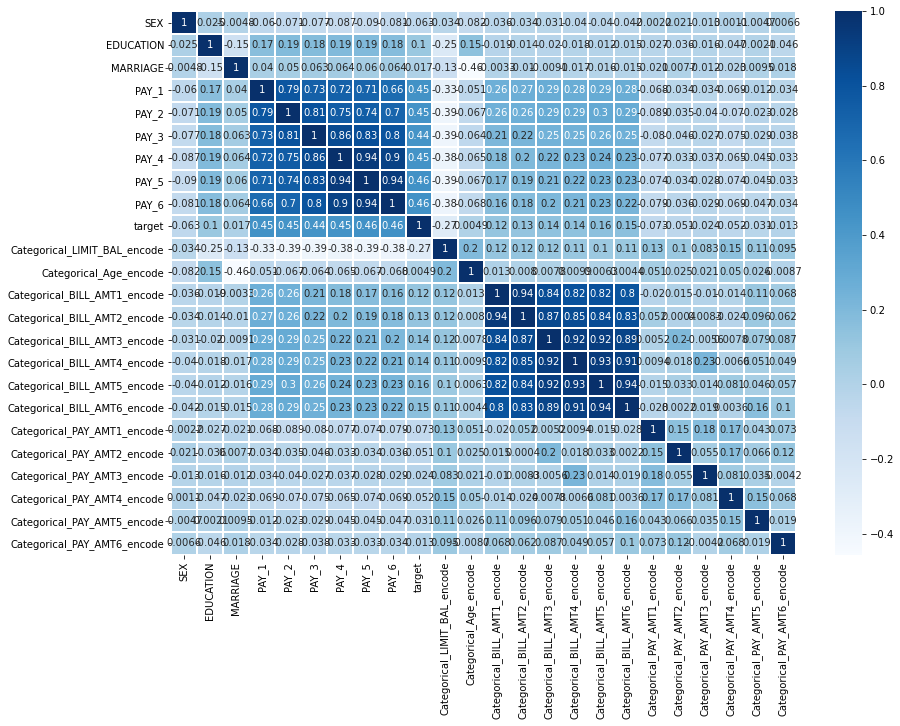

In [47]:
# Plot a heatmap to check for highly correlated columns
# if correlation between two columns > 0.95, then we drop one of the two columns

colormap = plt.cm.Blues

plt.figure(figsize=(14,10))
sns.heatmap(df_cleaned.corr(),cmap = colormap,annot=True,linewidths=1)

In [48]:
# We now seperate the features and the target

X = df_cleaned.drop("target",axis=1)
y = df_cleaned['target']

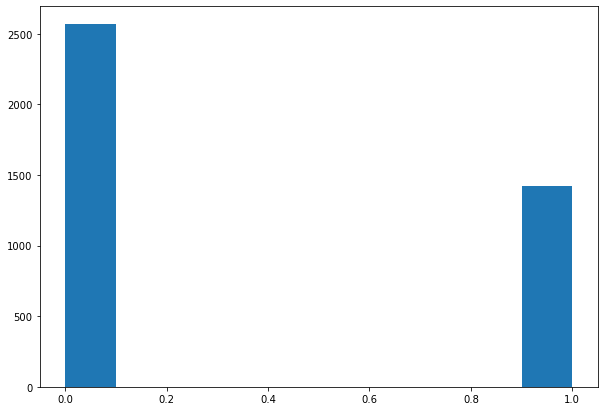

In [49]:
# check the distribution of target=0 and target=1 

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y)
plt.show()

In [50]:
# we split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# ------> selecting best features

C:\Users\Josh\anaconda3\envs\SignLangauge\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


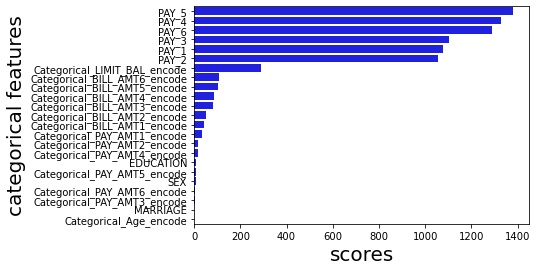

In [51]:
# we now select the best features from X using f_Scores 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

predictors = X_train.head(0)
# k = number of features to be selected using chi2
selector = SelectKBest(chi2, k='all')
sl_fit = selector.fit(X_train,y_train)



datset = pd.DataFrame()
datset['features'] = X.columns[range(len(sl_fit.scores_))]
datset['scores'] = sl_fit.scores_
datset = datset.sort_values("scores",ascending=False)
sns.barplot(datset['scores'], datset['features'], color='blue')
plt.ylabel('categorical features', fontsize=20)
plt.xlabel('scores',fontsize=20)
plt.show()

In [52]:
best = SelectKBest(chi2,k=10).fit(X_train, y_train)
X_train.columns[best.get_support()]

Index(['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'Categorical_LIMIT_BAL_encode', 'Categorical_BILL_AMT4_encode',
       'Categorical_BILL_AMT5_encode', 'Categorical_BILL_AMT6_encode'],
      dtype='object')

In [53]:
# removes other features and keeps only the best features

X_train = best.transform(X_train)
X_test = best.transform(X_test)

In [55]:
X_train[0]

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0], dtype=int64)

# ------> Using KNN algorithm to train and test model

Maximum accuracy:  0.793233082706767 at k = 34


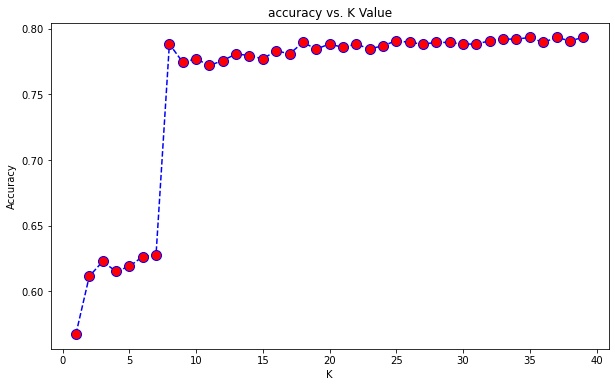

In [54]:
# we try finding the optimal value of k to get best performance of knn

from sklearn.neighbors import KNeighborsClassifier

acc = []

from sklearn import metrics
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    ypred = knn.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, ypred))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy: ",max(acc),"at k =",acc.index(max(acc)))

In [55]:
knn = KNeighborsClassifier(n_neighbors=34)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

In [56]:
from sklearn import metrics


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7919799498746867


[[455  71]
 [ 95 177]]


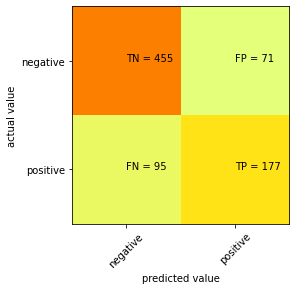

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap = plt.cm.Wistia)
classnames = ['negative','positive']
tick_marks = np.arange(len(classnames))
plt.xlabel("predicted value")
plt.ylabel("actual value")
plt.xticks(tick_marks,classnames,rotation=45)
plt.yticks(tick_marks,classnames)
s = [['TN','FP'],['FN','TP']]


for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [58]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:", (cm[1][1] / (cm[0][1] + cm[1][1])))
print("Recall:", (cm[1][1] / (cm[1][0] + cm[1][1])))

Accuracy: 0.7919799498746867
Precision: 0.7137096774193549
Recall: 0.6507352941176471


# ------> Using Random Forest Classifier to train and test model

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV



In [60]:
# Selecting the best parameters for Random Forest Classifier using GridSearchCV

rfc=RandomForestClassifier(n_estimators=100)

parameters = {
    "n_estimators": [50, 100, 150, 200, 250, 300, 500],
    "max_depth": [1, 3, 5, 7],
}

c = GridSearchCV(rfc, parameters, cv=5)
c.fit(X_train, np.ravel(y_train))

def display(results):
    print("best params are: ", results.best_params_)



display(c)

best params are:  {'max_depth': 5, 'n_estimators': 150}


In [61]:
rfc=RandomForestClassifier(n_estimators=250, max_depth=5)

rfc.fit(X_train,y_train)

y_pred2 =rfc.predict(X_test)

In [62]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.7944862155388471


[[449  77]
 [ 87 185]]


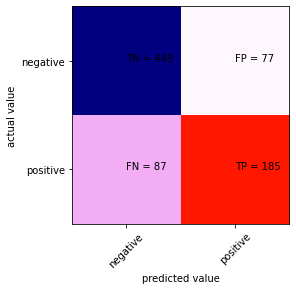

In [63]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test,y_pred2)
print(cm2)
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap = plt.cm.gist_ncar_r)
classnames = ['negative','positive']
tick_marks = np.arange(len(classnames))
plt.xlabel("predicted value")
plt.ylabel("actual value")
plt.xticks(tick_marks,classnames,rotation=45)
plt.yticks(tick_marks,classnames)
s = [['TN','FP'],['FN','TP']]


for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(cm2[i][j]))
plt.show()

In [64]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:", (cm2[1][1] / (cm2[0][1] + cm2[1][1])))
print("Recall:", (cm2[1][1] / (cm2[1][0] + cm2[1][1])))

Accuracy: 0.7944862155388471
Precision: 0.7061068702290076
Recall: 0.6801470588235294


# ------> Using Naive Bayes to train and test model

In [65]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,y_train)

y_pred3 =nb.predict(X_test)

[[447  79]
 [ 86 186]]


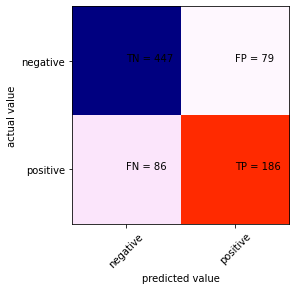

In [66]:
cm3 = confusion_matrix(y_test,y_pred3)
print(cm3)
plt.clf()
plt.imshow(cm3,interpolation='nearest',cmap = plt.cm.gist_ncar_r)
classnames = ['negative','positive']
tick_marks = np.arange(len(classnames))
plt.xlabel("predicted value")
plt.ylabel("actual value")
plt.xticks(tick_marks,classnames,rotation=45)
plt.yticks(tick_marks,classnames)
s = [['TN','FP'],['FN','TP']]


for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(cm3[i][j]))
plt.show()

In [67]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))
print("Precision:", (cm3[1][1] / (cm3[0][1] + cm3[1][1])))
print("Recall:", (cm3[1][1] / (cm3[1][0] + cm3[1][1])))

Accuracy: 0.793233082706767
Precision: 0.7018867924528301
Recall: 0.6838235294117647


In [68]:
print("KNN PERFORMANCE:")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:", (cm[1][1] / (cm[0][1] + cm[1][1])))
print("Recall:", (cm[1][1] / (cm[1][0] + cm[1][1])))
print("")
print("RANDOM FOREST CLASSIFIER PERFORMANCE: ")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:", (cm2[1][1] / (cm2[0][1] + cm2[1][1])))
print("Recall:", (cm2[1][1] / (cm2[1][0] + cm2[1][1])))
print("")
print("NAIVE BAYES PERFORMANCE: ")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))
print("Precision:", (cm3[1][1] / (cm3[0][1] + cm3[1][1])))
print("Recall:", (cm3[1][1] / (cm3[1][0] + cm3[1][1])))

KNN PERFORMANCE:
Accuracy: 0.7919799498746867
Precision: 0.7137096774193549
Recall: 0.6507352941176471

RANDOM FOREST CLASSIFIER PERFORMANCE: 
Accuracy: 0.7944862155388471
Precision: 0.7061068702290076
Recall: 0.6801470588235294

NAIVE BAYES PERFORMANCE: 
Accuracy: 0.793233082706767
Precision: 0.7018867924528301
Recall: 0.6838235294117647


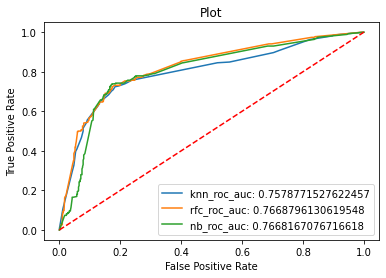

In [69]:
from sklearn.metrics import roc_auc_score, roc_curve


fpr1,tpr1,thresholds1 = roc_curve(y_test, knn.predict_proba(X_test)[:,1])

fpr2,tpr2,thresholds2 = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])


fpr3,tpr3,thresholds3 = roc_curve(y_test, nb.predict_proba(X_test)[:,1])

knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
rfc_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
nb_roc_auc = roc_auc_score(y_test, nb.predict(X_test))


plt.figure()
plt.plot(fpr1,tpr1,label="knn_roc_auc: "+str(knn_roc_auc))
plt.plot(fpr2,tpr2,label="rfc_roc_auc: "+str(rfc_roc_auc))
plt.plot(fpr3,tpr3,label="nb_roc_auc: "+str(nb_roc_auc))

plt.plot([0,1],[0,1],'r--')
plt.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("Plot")
plt.show()

## we see that all models perform the same more or less 

In [70]:
(df_cleaned.shape[1],)

(24,)

In [71]:
df_cleaned

,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,target,Categorical_LIMIT_BAL_encode,Categorical_Age_encode,Categorical_BILL_AMT1_encode,Categorical_BILL_AMT2_encode,Categorical_BILL_AMT3_encode,Categorical_BILL_AMT4_encode,Categorical_BILL_AMT5_encode,Categorical_BILL_AMT6_encode,Categorical_PAY_AMT1_encode,Categorical_PAY_AMT2_encode,Categorical_PAY_AMT3_encode,Categorical_PAY_AMT4_encode,Categorical_PAY_AMT5_encode,Categorical_PAY_AMT6_encode
11,1,1,2,0,0,0,0,0,2,0,2,3,0,0,0,0,0,0,0,0,0,0,0,0
21,1,2,1,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0
28,1,3,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0
30,1,1,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
48,0,2,2,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29934,0,2,1,0,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0
29942,0,3,1,0,0,0,0,0,0,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0
29976,0,2,2,2,2,3,2,2,2,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0
29991,0,2,1,3,2,2,2,2,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
